In [3]:
from mdss.ScoringFunctions.Bernoulli import Bernoulli
from mdss.ScoringFunctions.Poisson import Poisson
from mdss.MDSS import MDSS

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings('ignore')

In [4]:
dff2 = pd.read_csv('/dataF/madiva/data/nnr/project_2/project2_data_26_02_24_autostrat.csv')
target_cols = ['diabetes_status_c_phase1']
dff2.columns

Index(['study_id', 'age_phase1', 'site', 'sex',
       'highest_level_of_education_phase1', 'partnership_status_c_phase1',
       'ses_site_quintile_c_phase1', 'occupation_phase1',
       'alcohol_use_status_c_phase1', 'smoking_status_c_phase1',
       'diabetes_history_phase1', 'mvpa_c_phase1', 'weight_phase1',
       'bmi_c_phase1', 'waist_hip_r_c_phase1', 'waist_circumference_phase1',
       'bp_sys_average_phase1', 'bp_dia_average_phase1',
       'fasting_confirmation_phase1', 'glucose_result_phase1',
       's_creatinine_phase1', 'insulin_result_phase1', 'hdl_phase1',
       'cholesterol_1_phase1', 'friedewald_ldl_c_phase1',
       'triglycerides_phase1', 'hypertension_status_c_phase1',
       'diabetes_status_c_phase1', 'non_hdl_c_phase1', 'egfr_c_phase1',
       'acr_c_phase1', 'age_phase2', 'diabetes_status_c_phase2',
       'hypertension_status_phase2', 'smoking_status_c_phase2',
       'diabetes_history_phase2', 'mvpa_c_phase2', 'weight_phase2',
       'bmi_c_phase2', 'waist_

In [5]:
dff2.columns

Index(['study_id', 'age_phase1', 'site', 'sex',
       'highest_level_of_education_phase1', 'partnership_status_c_phase1',
       'ses_site_quintile_c_phase1', 'occupation_phase1',
       'alcohol_use_status_c_phase1', 'smoking_status_c_phase1',
       'diabetes_history_phase1', 'mvpa_c_phase1', 'weight_phase1',
       'bmi_c_phase1', 'waist_hip_r_c_phase1', 'waist_circumference_phase1',
       'bp_sys_average_phase1', 'bp_dia_average_phase1',
       'fasting_confirmation_phase1', 'glucose_result_phase1',
       's_creatinine_phase1', 'insulin_result_phase1', 'hdl_phase1',
       'cholesterol_1_phase1', 'friedewald_ldl_c_phase1',
       'triglycerides_phase1', 'hypertension_status_c_phase1',
       'diabetes_status_c_phase1', 'non_hdl_c_phase1', 'egfr_c_phase1',
       'acr_c_phase1', 'age_phase2', 'diabetes_status_c_phase2',
       'hypertension_status_phase2', 'smoking_status_c_phase2',
       'diabetes_history_phase2', 'mvpa_c_phase2', 'weight_phase2',
       'bmi_c_phase2', 'waist_

In [6]:
dff2.diabetes_status_c_phase1.value_counts(normalize=True)

diabetes_status_c_phase1
0    0.920695
1    0.079305
Name: proportion, dtype: float64

In [7]:
dff3 = dff2.loc[((dff2.loc[:,'fasting_confirmation_phase1'] == 1))].copy()
# dff3

In [8]:
print('With both fasting and non-fasting: ', dff2.shape[0], 'individuals')
print('With both fasting only: ', dff3.shape[0], 'individuals')

With both fasting and non-fasting:  4489 individuals
With both fasting only:  3740 individuals


In [9]:
dff2.loc[:,'glucose_result_phase1'].max()

28.25

In [10]:
dff2.loc[:,'bp_sys_average_phase1'].max()

238.5

In [11]:
(dff2.shape[0] - dff3.shape[0])/dff2.shape[0]*100

16.685230563599912

(0.0, 15.0)

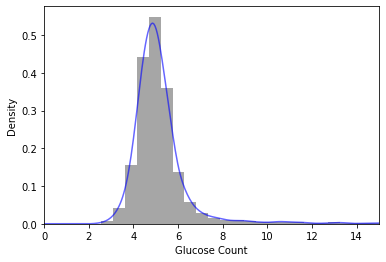

In [12]:
min_range = dff2['glucose_result_phase2'].min()
max_range = dff2['glucose_result_phase2'].max()

# Adjust the conditions according to your specific needs
filtered_data = dff2[(dff2['glucose_result_phase1'] > -30) & (dff2['glucose_result_phase1'] < 400)].copy()
filtered_data = filtered_data[(filtered_data['bp_sys_average_phase1'] > -30) & (filtered_data['bp_sys_average_phase1'] < 400)].copy()
fig = plt.figure()
ax = fig.add_subplot(111)
# Plotting the histogram
filtered_data['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, alpha=0.7, color='gray', ax=ax)  # Adjust bins as needed
filtered_data['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.14, alpha=0.6, color='blue')
ax.set_xlabel('Glucose Count')
# dff3['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.3, color='green')
ax.set_xlim(0, 15)  # Adjust these values as needed

In [13]:
filtered_data.site.value_counts(normalize=True)*100

site
1    53.501991
3    46.498009
Name: proportion, dtype: float64

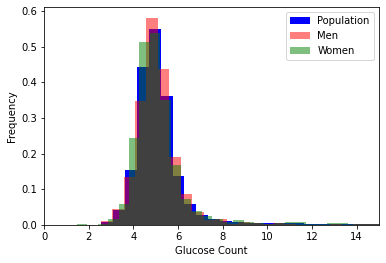

<Figure size 720x576 with 0 Axes>

In [14]:
# Adjust the conditions according to your specific needs
# filtered_data = dff2[(dff2['glucose_result_phase1'] > -30) & (dff2['glucose_result_phase1'] < 400)].copy()
fig = plt.figure()
plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
# Plotting the histogram
filtered_data['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='blue', ax=ax, label='Population')
filtered_data.loc[((filtered_data.loc[:,'sex'] == 1))]['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, alpha=0.5, color='red', ax=ax, label='Men') 
filtered_data.loc[((filtered_data.loc[:,'sex'] == 0))]['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, alpha=0.5, color='green', ax=ax, label='Women') 
# filtered_data.loc[((filtered_data.loc[:,'sex'] == 1))]['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, alpha=0.7, color='gray', ax=ax)  # Adjust bins as needed
# filtered_data.loc[((filtered_data.loc[:,'sex'] == 0))]['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.14, alpha=0.6, color='blue')
# dff3['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.3, color='green')
ax.set_xlabel('Glucose Count')
# plt.ylabel('Frequency')
ax.set_xlim(0, 15)  # Adjust these values as needed
ax.legend()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


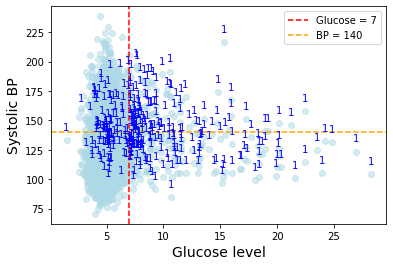

In [15]:
# Plot counts
plt.scatter(filtered_data['glucose_result_phase1'], filtered_data['bp_sys_average_phase1'], marker='o', color='lightblue', alpha=0.5)
# Add labels and title
plt.xlabel('Glucose level', fontsize=14, fontname="Arial")
plt.ylabel('Systolic BP', fontsize=14, fontname="Arial")

# Loop through the rows of the DataFrame to annotate points where 'status' equals 1
for i, row in filtered_data.iterrows():
    if row['diabetes_status_c_phase1'] == 1:
        plt.annotate('1', (row['glucose_result_phase1'], row['bp_sys_average_phase1']), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

# Adding a horizontal line from glucose level of 7 across the plot
plt.axvline(x=7, color='red', linestyle='--', label='Glucose = 7')

# Adding a vertical line from BP level of 130 across the plot
plt.axhline(y=140, color='orange', linestyle='--', label='BP = 140')

plt.legend()

# Display the plot
plt.show()

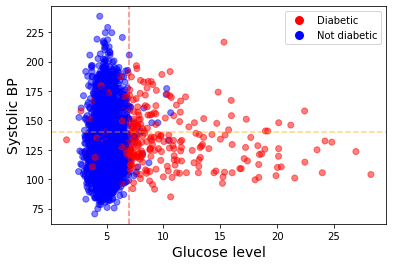

In [16]:
# Create a color array based on the 'status' column, where 'red' indicates status=1, and another color (e.g., 'blue') for status=0
colors = np.where(filtered_data['diabetes_status_c_phase1'] == 1, 'red', 'blue')  # Red for status 1, blue for status 0

# Create the scatter plot with conditional colors
plt.scatter(filtered_data['glucose_result_phase1'], filtered_data['bp_sys_average_phase1'], marker='o', color=colors, alpha=0.5)

# Add labels and title
plt.xlabel('Glucose level', fontsize=14, fontname="Arial")
plt.ylabel('Systolic BP', fontsize=14, fontname="Arial")

# Optional: Add lines as per previous instructions
plt.axvline(x=7, color='red', linestyle='--', label='Glucose = 7', alpha=0.5)
plt.axhline(y=140, color='orange', linestyle='--', label='BP = 130', alpha=0.5)

# Adding a custom legend manually because plt.scatter() does not automatically create a legend for color conditions
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetic'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Not diabetic')]
plt.legend(handles=legend_elements)


# Display the plot
plt.show()


In [17]:
numeric_columns = [col for col in filtered_data.columns \
                     if (is_numeric_dtype(filtered_data[col])) \
                     & (col not in target_cols) \
                     & (filtered_data[col].nunique() > 10)]

In [18]:
site_id = 1 # 1 - Agincourt, 3 - Nairobi

# Choose the relevant site and age group
dff = filtered_data[(filtered_data['age_phase1'] <= 60) & (filtered_data['age_phase1'] >= 40)].fillna(-999)

print('Original size: ', dff.shape)
dff = dff[(dff[target_cols] != -999).sum(axis = 1) == len(target_cols)].copy()
print('Size after removing records with missing targets: ', dff.shape)

Original size:  (3255, 73)
Size after removing records with missing targets:  (3255, 73)


In [19]:
# filtered_data['observed'] = (filtered_data['Temperature'] <= 0).astype(int)
# filtered_data = filtered_data.drop(columns=['glucose_result_phase1'])

# for col in ['weight_phase1', 'bmi_c_phase1', 'waist_hip_r_c_phase1',
#        'waist_circumference_phase1', 'bp_sys_average_phase1',
#        'bp_dia_average_phase1']:
#         dff[col] = pd.qcut(dff[col], 10, duplicates='drop')
#         dff[col] = dff[col].apply(lambda x: str(round(x.left, 2)) + ' - ' + str(round(x.right,2)))

dff['observed'] = (dff['glucose_result_phase1'])
dff['expectation'] = dff['observed'].mean()

In [20]:
dff['observed'].value_counts()

observed
4.44     32
4.77     26
5.06     26
4.51     25
4.76     24
         ..
15.73     1
21.55     1
10.47     1
8.95      1
8.63      1
Name: count, Length: 526, dtype: int64

In [21]:
# Defining the search space to be all the features except site, study_id, 
# and our created target_col and expectations columns

search_space = [col for col in dff.columns \
                if col not in \
                ['study_id','age_phase2', 'diabetes_status_c_phase2',
       'hypertension_status_phase2', 'smoking_status_c_phase2', 'site',
       'diabetes_history_phase2', 'mvpa_phase2', 'weight_phase2','s_creatinine_phase1','insulin_result_phase1',
       'bmi_c_phase2', 'waist_circumference_phase2','weight_phase1', 'waist_hip_r_c_phase2',
       'bp_sys_average_phase2', 'bp_dia_average_phase2', 'diabetes_status_c_phase1',
       'fasting_confirmed_phase2', 'glucose_result_phase2', 'hypertension_status_c_phase1',
       's_creatinine_phase2', 'insulin_result_phase2', 'hdl_phase2',
       'cholesterol_1_phase2', 'friedewald_ldl_c_phase2', 'mvpa_c_phase2', 'change_in_mvpa',
       'triglycerides_phase2', 'non_hdl_c_phase2', 'egfr_c_phase2',
       'acr_c_phase2', 'change_in_weight', 'change_in_bmi', 'non_hdl_c_phase1',
       'change_in_waist_hip_ratio', 'change_in_waist_circf',
       'change_in_systolic_ave', 'change_in_diastolic_ave', 'fasting_confirmation_phase1',
       'change_in_cholesterol', 'change_in_friedewald', 'change_in_hdl',
       'change_in_triglycerides', 'change_in_glucose', 'glucose_result_phase1',
       'change_in_s_creatinine', 'change_in_insulin', 'change_in_non_hdl',
       'change_in_egfr', 'change_in_acr', 'MAP_phase1', 'MAP_phase2', 'expectation', 'observed']]

In [22]:
# No HIV data
print(len(search_space))
search_space

21


['age_phase1',
 'sex',
 'highest_level_of_education_phase1',
 'partnership_status_c_phase1',
 'ses_site_quintile_c_phase1',
 'occupation_phase1',
 'alcohol_use_status_c_phase1',
 'smoking_status_c_phase1',
 'diabetes_history_phase1',
 'mvpa_c_phase1',
 'bmi_c_phase1',
 'waist_hip_r_c_phase1',
 'waist_circumference_phase1',
 'bp_sys_average_phase1',
 'bp_dia_average_phase1',
 'hdl_phase1',
 'cholesterol_1_phase1',
 'friedewald_ldl_c_phase1',
 'triglycerides_phase1',
 'egfr_c_phase1',
 'acr_c_phase1']

In [23]:
def get_str(x):
    # This function turns a pandas bin to a meaningful string
    s = str(round(x.left, 2)) + ' - ' + str(round(x.right,2))
    return s

def custom_qcut(ser, contiguous = True):
    # Get the rows that are actual numbers
    sub_ser = ser[(ser != -111) \
                     & (ser != -222) \
                     & (ser != -555) \
                     & (ser != -999)]
    
    if contiguous:
        # if contiguous, treat all the special numbers the same
        ser = ser.replace(-111 , -999)
        ser = ser.replace(-222 , -999)
        ser = ser.replace(-555 , -999)

    # Bin the actual numbers into 10 bins for scanning
    sub_ser = pd.qcut(sub_ser, 10, duplicates='drop')
    sub_ser = sub_ser.apply(get_str).astype(str)
    ser[list(sub_ser.index)] = sub_ser
    return ser
            

In [24]:
contiguous = {}
dff_2 = dff.copy()

# Create a new dataframe with the numeric columns bins     
for col in numeric_columns:
    if col in search_space:
        dff_2[col] = custom_qcut(dff_2[col].copy())
        
        bins = list(dff_2[col].unique())
        
        if -999 in bins:
            bins.remove(-999)
        
        bins = sorted(bins, key=lambda x : float(x.split(' - ')[0]))
        
        contiguous[col] = bins

In [25]:
def compress_contiguous(subset, contiguous):
    # Shorten a contiguous list e.g [0-9, 10-19] is converted to [0 - 19] 
    new = {}
    
    for col in subset:
        if col in contiguous:
            if isinstance(subset[col][0], (float,int)):
                new[col] = [str(c) for c in subset[col]]
                continue
            i = -1 if isinstance(subset[col][-1], str) else -2
            new[col] = [subset[col][0].split(' - ')[0] + ' - ' + subset[col][i].split(' - ')[-1]]
            new[col] = new[col] if i == -1 else new[col] + [str(subset[col][-1])]
        else:
            new[col] = [str(c) for c in subset[col]]
    return new

def translate_subset_to_rule(subset):
    # Print the subset as a rule for easier understanding
    desc = ''
    for key, value in subset.items():
        # desc += key + ' = {' + ' OR '.join(value) + '} AND' + '\n'
        desc += key + '{' + ' OR '.join(value) + '} AND' + ' '

    return desc[:-5].replace('_',' ').replace('{', '[').replace('}', ']')

def count_conditions(subset):
    # Split the string by 'AND' and 'OR'
    conditions = subset.replace("AND", "OR").split("OR")
    
    # Count the number of conditions
    condition_count = len(conditions)
    
    return condition_count

#### All sites - `Agincourt` and ``Nairobi``

In [26]:
from mdss.ScoringFunctions.Gaussian import Gaussian
from mdss.ScoringFunctions.BerkJones import BerkJones
import scipy.stats as stats
penalty = 4500
num_iters = 10
scoring_function = Gaussian(direction="positive", var=dff_2['observed'].var())
scanner = MDSS(scoring_function)
# dff_2['expectation']= alpha

subset, score = scanner.scan( dff_2[search_space] , dff_2['observed'] , dff_2['expectation'] , penalty=penalty , num_iters=num_iters, mode='continuous', contiguous=contiguous.copy())

to_choose = dff_2[subset.keys()].isin(subset).all(axis=1)
temp_df = dff_2.loc[to_choose]
not_temp_df = dff_2.loc[~to_choose]
size = len(temp_df)
# Perform a t-test
t_stat, p_value = stats.ttest_ind(dff_2['observed'], temp_df['observed'])
print(translate_subset_to_rule(compress_contiguous(subset, contiguous)))
print('Subset size: ',size)
print('Number of literals: ',count_conditions(translate_subset_to_rule(compress_contiguous(subset, contiguous))))
print('Score: ',score)
print('p-value: ',p_value)
"{:e}".format(p_value)
# print("Subset: \n{}".format(subset))
# print("\nScore: {}".format(score))

triglycerides phase1[0.97 - 5.6 OR -999.0] AND waist hip r c phase1[0.85 - 9.02] AND bmi c phase1[20.77 - 68.02]
Subset size:  932
Number of literals:  4
Score:  28348.963522697566
p-value:  1.8155436723564183e-15


'1.815544e-15'

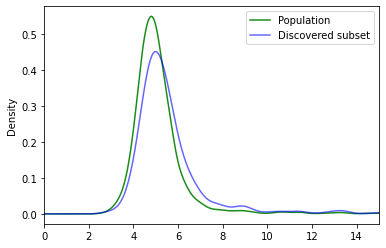

<Figure size 720x576 with 0 Axes>

In [27]:
fig = plt.figure()
plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
# Plotting the histogram
# dff_2['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='green', alpha=0.4, ax=ax, label='Population')
dff_2['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.9, color='green', label='Population')
# temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='blue', alpha=0.5, ax=ax, label='Discovered subset')
temp_df['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.6, color='blue', label='Discovered subset')
# not_temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='red', alpha=0.5, ax=ax, label='Not in subset')
# not_temp_df['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.6, color='red', label='Not in subset')
ax.set_xlim(0, 15)
ax.legend()

In [29]:
# %%time
import scipy.stats as stats
# Scan in the positive direction using defined penalties and num iters

scoring_function = Gaussian(direction="positive", var=dff_2['observed'].var())
scanner = MDSS(scoring_function)
# Define a list of penalty values to loop through
penalty_values = [50, 100, 200, 300,500, 600, 700, 1000, 1500, 2000, 2500, 3000, 3500, 5000]
# penalty_values = [1.0, 1.5, 2, 2.5]
num_iters = 5
# Initialize empty lists to store results
# Initialize empty lists to store results
subset_results = []
subset_results1 = []
score_results = []
size_results = []
size_percent = []
P_values = []
count_results = []
prev_rate = []
dataframes = {}

for penalty in penalty_values:
    # Perform the scan with the current penalty value

    subset, score = scanner.scan( dff_2[search_space] , dff_2['observed'] , dff_2['expectation'] , penalty=penalty , num_iters=num_iters, mode='continuous', contiguous=contiguous.copy())
    
    to_choose = dff_2[subset.keys()].isin(subset).all(axis=1)
    temp_df = dff_2.loc[to_choose]

    # Store each DataFrame in the dictionary with a unique key
    dataframes[f'df_{penalty}'] = temp_df

    size_perc = temp_df.loc[((temp_df['diabetes_status_c_phase1'] == 1))].shape[0]/temp_df.shape[0]*100
    PR = (temp_df.loc[((temp_df['diabetes_status_c_phase1'] == 1))].shape[0]/temp_df.shape[0])/(dff_2.loc[((dff_2['diabetes_status_c_phase1'] == 1)) 
               ].shape[0]/dff_2.shape[0]) 

    size = len(temp_df)
    # observed_income = np.round(temp_df['observed'].mean(), 3)
    # positive_class_count = temp_df['observed'].sum()

    # group_obs = temp_df['observed'].mean()
    # group_prob = temp_df['expectation'].mean()
    # odds_mul = (group_obs / (1 - group_obs)) / (group_prob /(1 - group_prob))
    t_stat, p_value = stats.ttest_ind(dff_2['observed'], temp_df['observed'])
    counting = count_conditions(translate_subset_to_rule(compress_contiguous(subset, contiguous)))
    
    # Append the results to the respective lists

    # subset_results.append(subset)
    score_results.append(np.round(score, 2))
    size_results.append(size)
    P_values.append("{:e}".format(p_value))
    subset_results1.append(translate_subset_to_rule(compress_contiguous(subset, contiguous)))
    count_results.append(counting)
    size_percent.append(np.round(size_perc, 2))
    prev_rate.append(np.round(PR, 2))

# Displaying the results for each penalty value
for i, penalty in enumerate(penalty_values):
    print(f"Penalty = {penalty}: Subset = {subset_results1[i]}, \nLiteralsNumber = {count_results[i]}, \nSize = {size_results[i]}, \nSize percent = {size_percent[i]}, \nPrev rate = {prev_rate[i]}, P-value = {P_values[i]}, Score = {score_results[i]}")

Penalty = 50: Subset = acr c phase1[0.29 - 388.76 OR -999.0] AND age phase1[42.0 - 60.0] AND triglycerides phase1[0.68 - 5.6 OR -999.0] AND waist hip r c phase1[0.85 - 9.02 OR -999.0] AND smoking status c phase1[0 OR 2] AND waist circumference phase1[730.0 - 1480.0 OR -999.0] AND bmi c phase1[20.77 - 68.02], 
LiteralsNumber = 12, 
Size = 1158, 
Size percent = 12.87, 
Prev rate = 1.92, P-value = 1.963688e-13, Score = 51832.46
Penalty = 100: Subset = acr c phase1[0.29 - 388.76 OR -999.0] AND age phase1[42.0 - 60.0] AND triglycerides phase1[0.68 - 5.6 OR -999.0] AND waist hip r c phase1[0.85 - 9.02 OR -999.0] AND smoking status c phase1[0 OR 2] AND waist circumference phase1[730.0 - 1480.0 OR -999.0] AND bmi c phase1[20.77 - 68.02], 
LiteralsNumber = 12, 
Size = 1158, 
Size percent = 12.87, 
Prev rate = 1.92, P-value = 1.963688e-13, Score = 51232.46
Penalty = 200: Subset = acr c phase1[0.29 - 388.76 OR -999.0] AND age phase1[42.0 - 60.0] AND triglycerides phase1[0.68 - 5.6 OR -999.0] AND 

In [30]:
results_df = pd.DataFrame({
    'Penalty': penalty_values,
    'No of literals': count_results,
    'Subset': subset_results1,
    'Size': size_results,
    'Score': score_results,
    'Subset HT rate (%)': size_percent,
    'Prevalence ratio': prev_rate,
    'P-value': P_values,
})

# Display the DataFrame
results_df

,Penalty,No of literals,Subset,Size,Score,Subset HT rate (%),Prevalence ratio,P-value
0,50,12,acr c phase1[0.29 - 388.76 OR -999.0] AND age ...,1158,51832.46,12.87,1.92,1.963688e-13
1,100,12,acr c phase1[0.29 - 388.76 OR -999.0] AND age ...,1158,51232.46,12.87,1.92,1.963688e-13
2,200,10,acr c phase1[0.29 - 388.76 OR -999.0] AND age ...,1161,50226.36,12.83,1.92,2.361597e-13
3,300,10,acr c phase1[0.29 - 388.76 OR -999.0] AND age ...,1161,49226.36,12.83,1.92,2.361597e-13
4,500,10,acr c phase1[0.29 - 388.76 OR -999.0] AND smok...,1161,47226.36,12.83,1.92,2.361597e-13
5,600,10,acr c phase1[0.29 - 388.76 OR -999.0] AND age ...,1161,46226.36,12.83,1.92,2.361597e-13
6,700,9,waist hip r c phase1[0.85 - 9.02] AND triglyce...,1158,45239.46,12.78,1.91,3.082080e-13
7,1000,7,smoking status c phase1[0 OR 2] AND triglyceri...,1213,43129.28,12.53,1.87,2.387552e-12
8,1500,5,triglycerides phase1[0.68 - 5.6 OR -999.0] AND...,1306,40551.80,11.94,1.78,4.111588e-11
9,2000,4,triglycerides phase1[0.97 - 5.6 OR -999.0] AND...,932,38348.96,12.88,1.92,1.815544e-15


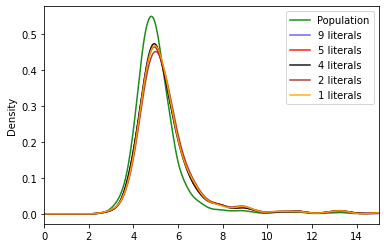

<Figure size 720x576 with 0 Axes>

In [31]:
# dataframes['df_50']
fig = plt.figure()
plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
# Plotting the histogram
# dff_2['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='green', alpha=0.4, ax=ax, label='Population')
dff_2['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.9, color='green', label='Population')
# temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='blue', alpha=0.5, ax=ax, label='Discovered subset')
dataframes['df_200']['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.6, color='blue', label='9 literals')
dataframes['df_300']['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.9, color='red', label='5 literals')
dataframes['df_1000']['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.9, color='black', label='4 literals')
dataframes['df_2000']['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.9, color='brown', label='2 literals')
dataframes['df_5000']['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.9, color='orange', label='1 literals')
# not_temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='red', alpha=0.5, ax=ax, label='Not in subset')
# not_temp_df['glucose_result_phase1'].plot(kind='kde', ax=ax, bw_method=0.12, alpha=0.6, color='red', label='Not in subset')
ax.set_xlim(0, 15)
ax.legend()

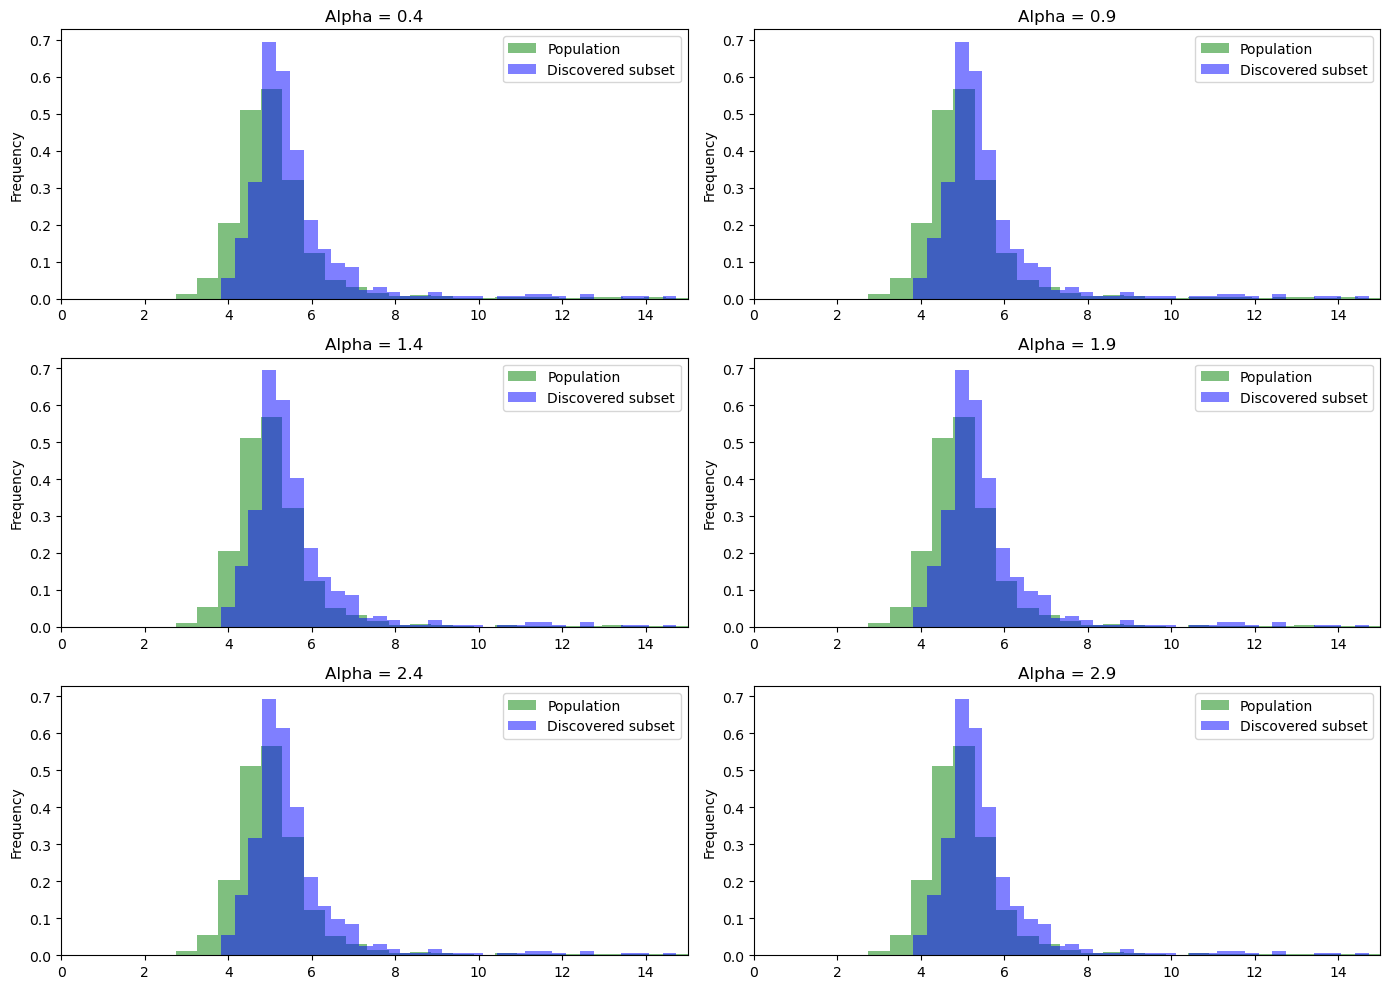

In [ ]:
# Define the range of alpha values
alpha_values = [0.4 + i * 0.5 for i in range(6)]

# Create a figure for plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Flatten the axes for easier iteration
axs = axs.flatten()

# Iterate over the alpha values
for i, alpha in enumerate(alpha_values):
    # Set the alpha value
    dff_2['expectation'] = alpha
    
    # Perform scanning of subsets
    subset, score = scanner.scan(dff_2[search_space], dff_2['observed'], dff_2['expectation'], penalty=penalty, num_iters=num_iters, mode='continuous', contiguous=contiguous.copy())
    
    # Choose subset from original population
    to_choose = dff_2[subset.keys()].isin(subset).all(axis=1)
    temp_df = dff_2.loc[to_choose]
    
    # Plot histogram for the current alpha value
    ax = axs[i]
    dff_2['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='green', alpha=0.5, ax=ax, label='Population')
    temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='blue', alpha=0.5, ax=ax, label='Discovered subset')
    ax.set_xlim(0, 15)
    ax.set_title(f'Alpha = {alpha}')
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


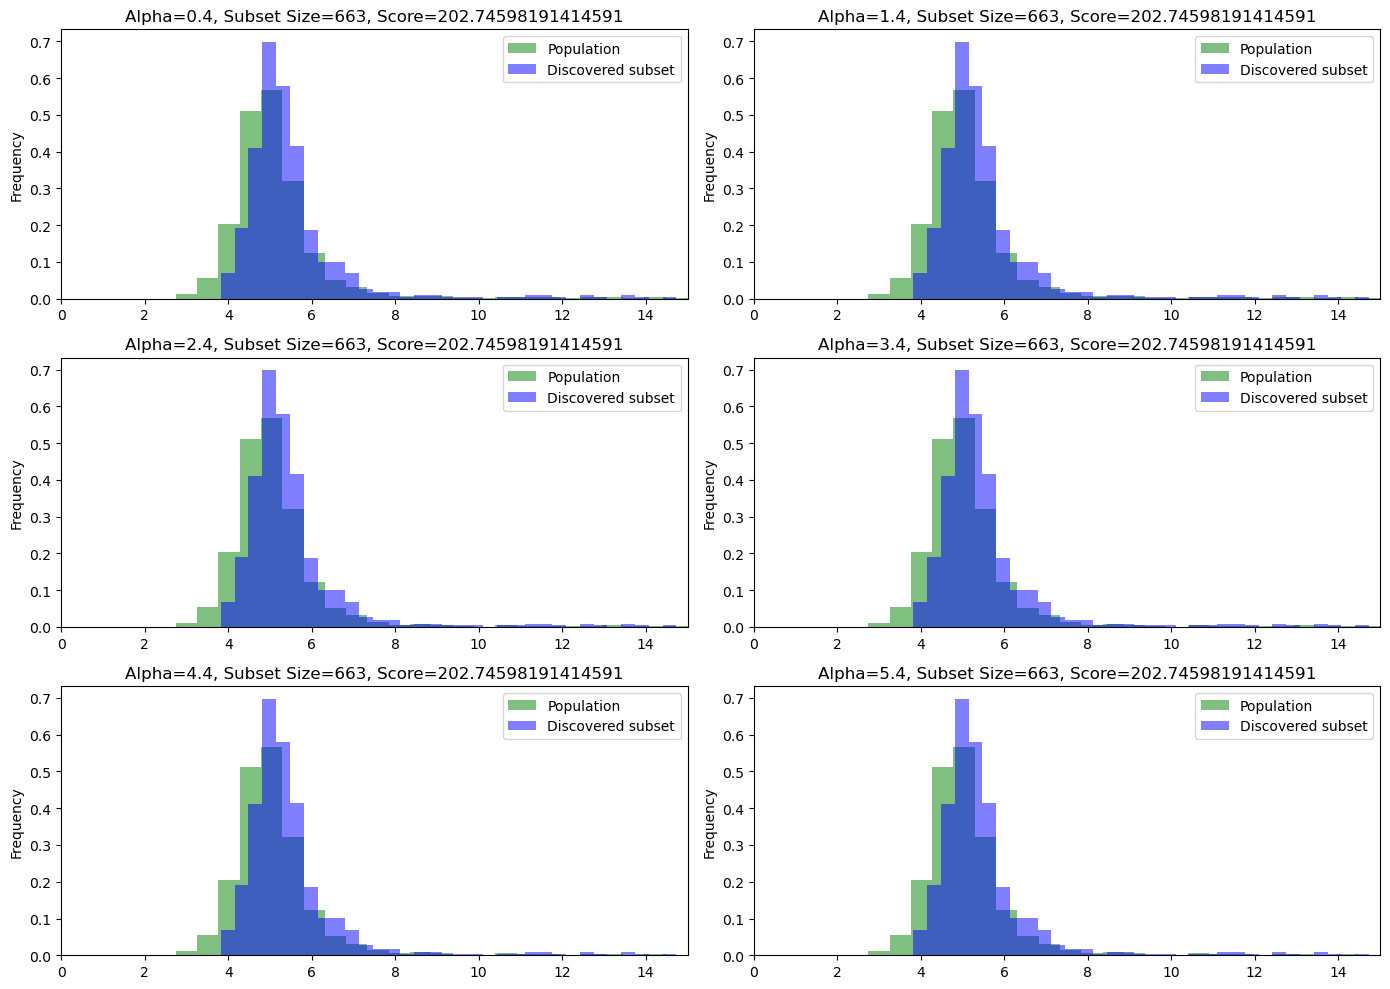

In [ ]:
# Define the range of alpha values
alpha_values = [0.4 + i * 1 for i in range(6)]

# Create a figure for plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Flatten the axes for easier iteration
axs = axs.flatten()

# Iterate over the alpha values
for i, alpha in enumerate(alpha_values):
    # Set the alpha value
    dff_2['expectation'] = alpha_values[i]
    
    # Perform scanning of subsets
    subset, score = scanner.scan(dff_2[search_space], dff_2['observed'], dff_2['expectation'], penalty=penalty, num_iters=num_iters, mode='continuous', contiguous=contiguous.copy())
    
    # Choose subset from original population
    to_choose = dff_2[subset.keys()].isin(subset).all(axis=1)
    temp_df = dff_2.loc[to_choose]
    
    # Calculate subset size
    size = len(temp_df)
    
    # Plot histogram for the current alpha value
    ax = axs[i]
    dff_2['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='green', alpha=0.5, ax=ax, label='Population')
    temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='blue', alpha=0.5, ax=ax, label='Discovered subset')
    ax.set_xlim(0, 15)
    ax.set_title(f'Alpha={alpha}, Subset Size={size}, Score={score}')
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


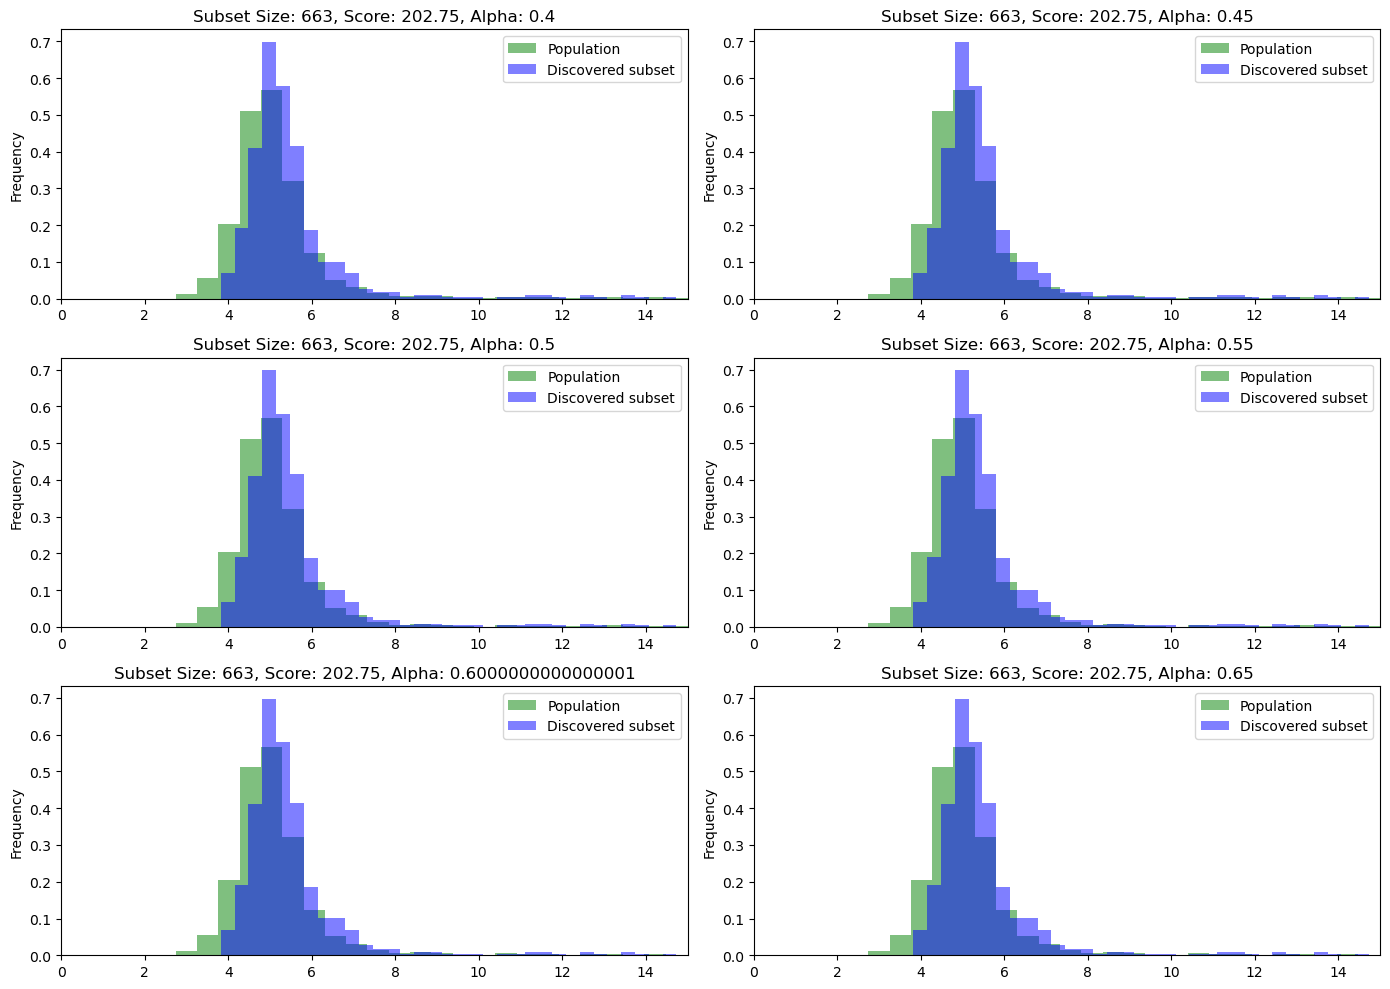

In [ ]:
# Define the range of alpha values
alpha_values = [0.4 + i * 0.05 for i in range(6)]

fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Flatten the axes for easier iteration
axs = axs.flatten()

# Iterate over the alpha values
for i, alpha in enumerate(alpha_values):
    # Set the alpha value
    dff_2['expectation'] = alpha_values[i]
    
    # Perform scanning of subsets
    subset, score = scanner.scan(dff_2[search_space], dff_2['observed'], dff_2['expectation'], penalty=penalty, num_iters=num_iters, mode='continuous', contiguous=contiguous.copy())
    
    # Choose subset from original population
    to_choose = dff_2[subset.keys()].isin(subset).all(axis=1)
    temp_df = dff_2.loc[to_choose]
    
    # Plot histogram for the current alpha value
    ax = axs[i]
    dff_2['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='green', alpha=0.5, ax=ax, label='Population')
    temp_df['glucose_result_phase1'].plot(kind='hist', bins=50, density=True, color='blue', alpha=0.5, ax=ax, label='Discovered subset')
    ax.set_xlim(0, 15)
    ax_title = f"Subset Size: {len(temp_df)}, Score: {score:.2f}, Alpha: {alpha}"
    ax.set_title(ax_title)
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
alpha_values[0]

0.4

In [ ]:
plt.figure(figsize=(16, 10))
 
# Draw the density curve with it's area shaded
sns.kdeplot(heights, linewidth=2, fill=True)
# Invoke kdeplot() again to get reference to axes 
ax = sns.kdeplot(heights)
 
# Below code to shade partial region is from 
# https://stackoverflow.com/a/49100655
 
# Get all the lines used to draw the density curve 
kde_lines = ax.get_lines()[-1]
kde_x, kde_y = kde_lines.get_data()
 
# Use Numpy mask to filter the lines for region 
# reresenting height greater than 60 inches 
mask = kde_x > 60
filled_x, filled_y = kde_x[mask], kde_y[mask]
 
# Shade the partial region 
ax.fill_between(filled_x, y1=filled_y)
 
# vertical line at x = 60 for reference
plt.axvline(x=60, linewidth=3, linestyle='--')
 
plt.title("FIG 2. Partial Area: Taller Than 5 Feet", pad=20)
plt.xlabel("Height (inches)", labelpad=20)
plt.ylabel("Probability", labelpad=20)
plt.show()